<a href="https://colab.research.google.com/github/dsphd/animated-barnacle/blob/main/xAutoML_HW_project_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("breast-cancer.csv")

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


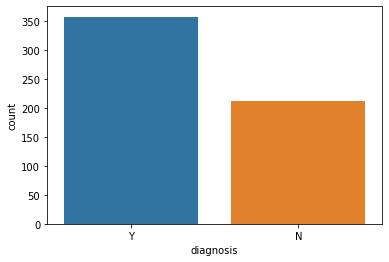

In [ ]:
# visualize the target variable
g = sns.countplot(data['diagnosis'])
g.set_xticklabels(['Y','N'])
plt.show()

In [ ]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a96edc6d0>,
      dtype=object)

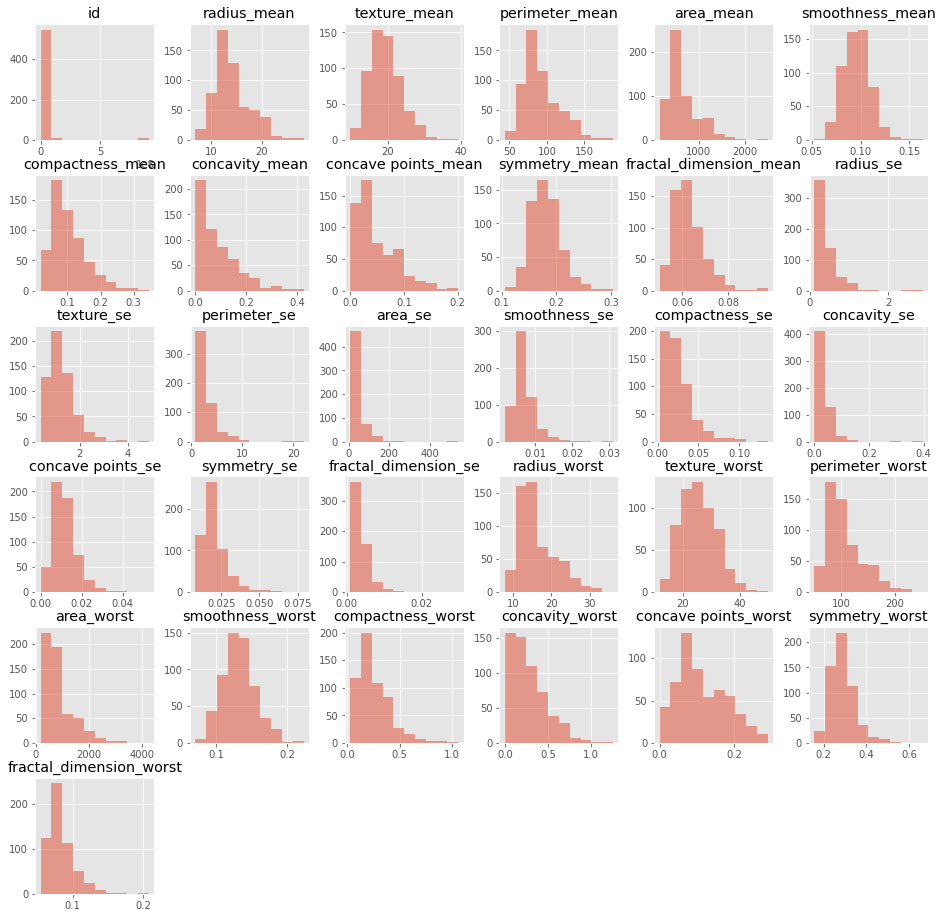

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
data.hist(alpha=0.5, figsize=(16, 16))

In [ ]:
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()  
standardscaler= StandardScaler()  
data["diagnosis"]=labelencoder.fit_transform(data["diagnosis"])
#data_scaled= st_x.fit_transform(data)  
#x_test= st_x.transform(x_test)  

In [ ]:
X=data.drop(['id','diagnosis'],axis=1)
X= standardscaler.fit(X)  
X_scaled= standardscaler.transform(X)
y=data["diagnosis"]
X_train,X_val,y_train,y_val = train_test_split(X_scaled,y, stratify=y,test_size=0.33, random_state=42)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Feature: 0, Score: 0.28276
Feature: 1, Score: 0.65893
Feature: 2, Score: 0.28832
Feature: 3, Score: 0.40821
Feature: 4, Score: 0.27811
Feature: 5, Score: -0.46693
Feature: 6, Score: 0.78219
Feature: 7, Score: 0.88696
Feature: 8, Score: -0.25184
Feature: 9, Score: -0.07894
Feature: 10, Score: 1.15741
Feature: 11, Score: -0.29403
Feature: 12, Score: 0.85577
Feature: 13, Score: 0.89489
Feature: 14, Score: 0.26886
Feature: 15, Score: -0.91114
Feature: 16, Score: -0.11575
Feature: 17, Score: 0.43175
Feature: 18, Score: -0.31824
Feature: 19, Score: -0.51488
Feature: 20, Score: 0.76959
Feature: 21, Score: 1.16427
Feature: 22, Score: 0.66592
Feature: 23, Score: 0.82449
Feature: 24, Score: 0.45884
Feature: 25, Score: -0.25115
Feature: 26, Score: 0.82333
Feature: 27, Score: 0.77968
Feature: 28, Score: 1.04997
Feature: 29, Score: 0.13251


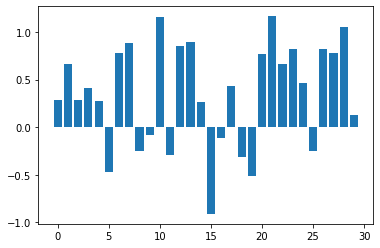

In [ ]:
from sklearn.model_selection import train_test_split
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model_lr = LogisticRegression()
# fit the model
model_lr.fit(X_train, y_train)
# get importance
importance = model_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
accuracy_score(y_val, model_lr.predict(X_val))
print(classification_report(y_val, model_lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       118
           1       0.98      0.91      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01946
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01787
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00247
Feature: 14, Score: 0.00155
Feature: 15, Score: 0.01036
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.02449
Feature: 19, Score: 0.00962
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01009
Feature: 22, Score: 0.74668
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01079
Feature: 25, Score: 0.00842
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.12435
Feature: 28, Score: 0.01384
Feature: 29, Score: 0.00000


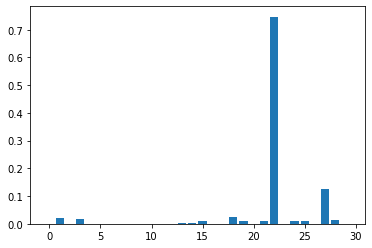

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model_dt = DecisionTreeClassifier()
# fit the model
model_dt.fit(X_train, y_train)
# get importance
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
accuracy_score(y_val, model_dt.predict(X_val))
print(classification_report(y_val, model_dt.predict(X_val)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       118
           1       0.90      0.79      0.84        70

    accuracy                           0.89       188
   macro avg       0.89      0.87      0.88       188
weighted avg       0.89      0.89      0.89       188



Feature: 0, Score: 0.05866
Feature: 1, Score: 0.01227
Feature: 2, Score: 0.05065
Feature: 3, Score: 0.05302
Feature: 4, Score: 0.00700
Feature: 5, Score: 0.01281
Feature: 6, Score: 0.04885
Feature: 7, Score: 0.10642
Feature: 8, Score: 0.00275
Feature: 9, Score: 0.00269
Feature: 10, Score: 0.01239
Feature: 11, Score: 0.00322
Feature: 12, Score: 0.01238
Feature: 13, Score: 0.02617
Feature: 14, Score: 0.00369
Feature: 15, Score: 0.00554
Feature: 16, Score: 0.00245
Feature: 17, Score: 0.00320
Feature: 18, Score: 0.00441
Feature: 19, Score: 0.00710
Feature: 20, Score: 0.10063
Feature: 21, Score: 0.01749
Feature: 22, Score: 0.16194
Feature: 23, Score: 0.10995
Feature: 24, Score: 0.01264
Feature: 25, Score: 0.01255
Feature: 26, Score: 0.03498
Feature: 27, Score: 0.08950
Feature: 28, Score: 0.01740
Feature: 29, Score: 0.00727


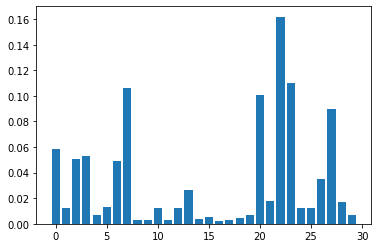

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model_rf = RandomForestClassifier()
# fit the model
model_rf.fit(X_train, y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
accuracy_score(y_val, model_rf.predict(X_val))
print(classification_report(y_val, model_rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.89      0.94        70

    accuracy                           0.96       188
   macro avg       0.97      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188



Feature: 0, Score: 0.02485
Feature: 1, Score: 0.02076
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.03929
Feature: 4, Score: 0.00660
Feature: 5, Score: 0.00522
Feature: 6, Score: 0.00072
Feature: 7, Score: 0.16433
Feature: 8, Score: 0.00673
Feature: 9, Score: 0.00474
Feature: 10, Score: 0.01578
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02176
Feature: 13, Score: 0.01085
Feature: 14, Score: 0.01952
Feature: 15, Score: 0.01668
Feature: 16, Score: 0.02377
Feature: 17, Score: 0.00284
Feature: 18, Score: 0.00609
Feature: 19, Score: 0.00748
Feature: 20, Score: 0.11244
Feature: 21, Score: 0.02152
Feature: 22, Score: 0.31064
Feature: 23, Score: 0.01529
Feature: 24, Score: 0.02067
Feature: 25, Score: 0.00629
Feature: 26, Score: 0.03397
Feature: 27, Score: 0.07580
Feature: 28, Score: 0.00538
Feature: 29, Score: 0.00000


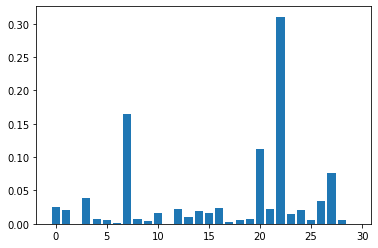

In [ ]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model_xgb = XGBClassifier()
# fit the model
model_xgb.fit(X_train, y_train)
# get importance
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
accuracy_score(y_val, model_xgb.predict(X_val))
print(classification_report(y_val, model_xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.90      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 8.3 MB/s 
     |████████████████████████████████| 38.1 MB 344 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 61.4 MB/s 
     |████████████████████████████████| 802 kB 55.9 MB/s 
     |████████████████████████████████| 4.2 MB 48.4 MB/s 
     |████████████████████████████████| 4.0 MB 45.7 MB/s 
     |████████████████████████████████| 208 kB 61.8 MB/s 
     |████████████████████████████████| 133 kB 47.6 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.3-py3-none-any.whl size=6586730 sha256=af88fc1975dd415e772412521085ea7d5d7e4d2a706a7c04e615aff05d01220c
  Stored in directory: /root/.cache/pip/wheels/28/df/95/a197368c9745885b878f69ae3d6aec0941ccc28e5e1ce585d4
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=171810e6162e316d8c706f4ac597c91aeb3eee9d7dd83b432caac940227b704

In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-axsh2k11
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-axsh2k11
     |████████████████████████████████| 154 kB 6.7 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-py3-none-any.whl size=27011 sha256=f7edfce14a2edef617c68a6680634b247c6f69f5eb19f742dd6443f0c77fd7ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-n850q8eo/wheels/47/a5/46/9ca750026db9dfa5de4bf4836194554cb0e2e01a245588ea59
Successfully built hpsklearn


In [ ]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=20,
    tmp_folder='tmp',
    #n_jobs=8
)
automl.fit(X_train, y_train, dataset_name='data')

AutoSklearnClassifier(per_run_time_limit=20, time_left_for_this_task=120,
                      tmp_folder='tmp')

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
32           1             0.08        liblinear_svc  0.015873  1.055361
2            2             0.02        random_forest  0.023810  2.116197
30           3             0.04                  lda  0.023810  1.104235
22           4             0.04          extra_trees  0.023810  1.726753
10           5             0.02          extra_trees  0.023810  1.984034
31           6             0.02          extra_trees  0.031746  2.272687
19           7             0.04          extra_trees  0.031746  3.375653
17           8             0.04                  mlp  0.031746  6.107903
6            9             0.04                  mlp  0.031746  1.577186
12          10             0.02    gradient_boosting  0.039683  1.636319
14          11             0.06                  mlp  0.039683  2.063079
27          12             0.08   passive_aggressiv

In [ ]:
print(automl.show_models())

[(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'liblinear_svc', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:liblinear_svc:C': 832.5744883902069, 'classifier:liblinear_svc:dual': 'False', 'classifier:liblinear_svc:fit_intercept': 'True', 'classifier:liblinear_svc:intercept_scaling': 1, 'classifier:liblinear_svc:loss': 'squared_hinge', 'classifier:liblinear_svc:multi_class': 'ovr', 'classifier:liblinear_svc:penalty': 'l2', 'classifier:liblinear_svc:tol': 0.015340961719445064, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'quantile

In [ ]:
from sklearn.metrics import accuracy_score
predictions = automl.predict(X_val)
print("Accuracy score:", accuracy_score(y_val, predictions))

Accuracy score: 0.9787234042553191


In [ ]:
from sklearn.metrics import classification_report
Y_pred = automl.predict(X_val)
print(classification_report(y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.94      0.97        70

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [194]:
run_key = list(automl.automl_.runhistory_.data.keys())[30]
print(automl.automl_.runhistory_.ids_config[run_key.config_id])

Configuration:
  balancing:strategy, Value: 'none'
  classifier:__choice__, Value: 'liblinear_svc'
  classifier:liblinear_svc:C, Value: 832.5744883902069
  classifier:liblinear_svc:dual, Constant: 'False'
  classifier:liblinear_svc:fit_intercept, Constant: 'True'
  classifier:liblinear_svc:intercept_scaling, Constant: 1
  classifier:liblinear_svc:loss, Value: 'squared_hinge'
  classifier:liblinear_svc:multi_class, Constant: 'ovr'
  classifier:liblinear_svc:penalty, Value: 'l2'
  classifier:liblinear_svc:tol, Value: 0.015340961719445064
  data_preprocessor:__choice__, Value: 'feature_type'
  data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__, Value: 'one_hot_encoding'
  data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__, Value: 'no_coalescense'
  data_preprocessor:feature_type:numerical_transformer:imputation:strategy, Value: 'median'
  data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__, Value

In [163]:
print("Configuration ID:", run_key.config_id)

Configuration ID: 33


In [ ]:
y_train.isnull().any()

False

In [ ]:
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
model = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=50, trial_timeout=30)
# perform the search
model.fit(X_train, y_train)

100%|██████████| 1/1 [00:00<00:00,  1.63it/s, best loss: 0.012987012987012991]


In [ ]:
print( model.best_model() )

{'learner': SGDClassifier(alpha=0.0003163855627170551, eta0=0.0069264319531390315,
              l1_ratio=0.5759613577668121, learning_rate='constant',
              max_iter=11093983.0, n_jobs=1, penalty='elasticnet',
              power_t=0.8356139815111139, random_state=0,
              tol=0.0018123785324411, verbose=False), 'preprocs': (MinMaxScaler(feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}


In [ ]:
# summarize performance
#acc = model.score(X_val, y_val)
#acc
Y_pred = model.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.94      0.97        70

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
bmodel = model.best_model()
bmodel = bmodel["learner"]


In [152]:
bmodel

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=3,
                     max_features=0.6545224287052555, n_estimators=607,
                     n_jobs=1, random_state=4, verbose=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

kf = KFold(n_splits=15,random_state=42,shuffle=True)


accuracy_trains = []
accuracy_tests = []
precision_trains = []
precision_tests = []
recall_trains = []
recall_tests = []


n = kf.get_n_splits()
for train_index, test_index in kf.split(X_train):
    
    X_train_c, X_test_c = X.iloc[train_index], X.iloc[test_index]
    y_train_c, y_test_c = y[train_index], y[test_index]
    
    X_train_norm = X_train_c
    X_test_norm = X_test_c
    mmsca = MinMaxScaler(feature_range=(0.0, 1.0))
    X_train_norm = mmsca.fit_transform(X_train_c)
    X_test_norm = mmsca.fit_transform(X_test_c)
    
    bmodel.fit(X_train_norm,y_train_c)
    y_train_pred = bmodel.predict(X_train_norm)
    y_test_pred = bmodel.predict(X_test_norm)
    
    
    precision_train = precision_score(y_train_c, y_train_pred)
    precision_trains.append(precision_train)
    
    precision_test = precision_score(y_test_c, y_test_pred)
    precision_tests.append(precision_test)
    
    recall_train = recall_score(y_train_c, y_train_pred)
    recall_trains.append(recall_train)
    
    recall_test = recall_score(y_test_c, y_test_pred)
    recall_tests.append(recall_test)
    
    
    accuracy_train = accuracy_score(y_train_c, y_train_pred)
    accuracy_trains.append(accuracy_train)
    
    accuracy_test = accuracy_score(y_test_c, y_test_pred)
    accuracy_tests.append(accuracy_test)

In [ ]:
def plot_metrics(folds,metrics_train,metrics_test, ylabel):
    plt.plot(folds, metrics_train, 'o-', color='green', label='train')
    plt.plot(folds, metrics_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel(ylabel)
    plt.show()

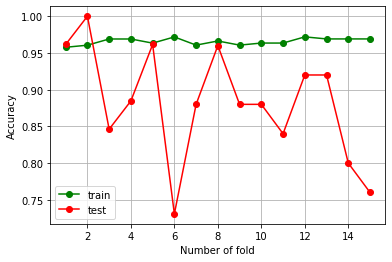

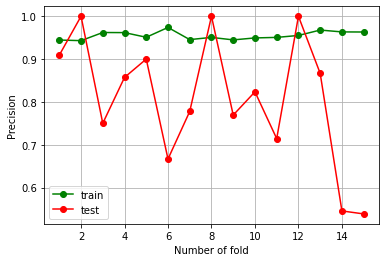

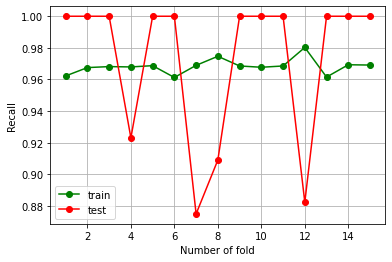

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plot_metrics(folds, accuracy_trains,accuracy_tests, 'Accuracy')
plot_metrics(folds, precision_trains,precision_tests, 'Precision')
plot_metrics(folds, recall_trains,recall_tests, 'Recall')

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [ ]:
# standardize the feature variables 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# create train and test data
X_train,X_val,y_train,y_val = train_test_split(X_scaled,y, stratify=y,test_size=0.33, random_state=42)

In [ ]:
# define hyperparameter space
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [ ]:
# define objective function

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [ ]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [07:39<00:00,  4.59s/it, best loss: -0.9658236500341764]
Best: {'criterion': 1, 'max_depth': 10.0, 'n_estimators': 0}


In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
hpest = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=150, trial_timeout=30)
# perform the search
hpest.fit(X_train, y_train)

100%|██████████| 1/1 [00:00<00:00,  4.15it/s, best loss: 0.012987012987012991]


In [ ]:
print( hpest.best_model() )

{'learner': SGDClassifier(alpha=0.018709741728706902, eta0=0.00010567997637235681,
              l1_ratio=0.1691656815660722, learning_rate='constant',
              max_iter=195827545.0, n_jobs=1, penalty='l1',
              power_t=0.4495351627489859, random_state=2,
              tol=9.165066634427971e-05, verbose=False), 'preprocs': (StandardScaler(with_mean=False),), 'ex_preprocs': ()}


In [ ]:
Y_pred = hpest.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.90      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 5.7 MB/s 


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

N_ITER = 54
N_JOBS = 1
N_ITER_NO_CHANGE = 100
RANDOM_STATE = 10
SCORING_METRIC = 'roc_auc'
K_FOLDS = 10
hyper_parameters = {
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'min_samples_split': Integer(2, 300),
        'learning_rate': Real(3e-6, 3e-1,prior='log-uniform'),     
        'max_features': Categorical(['sqrt', None]),
}
search_space = BayesSearchCV(
    estimator=GradientBoostingClassifier(
        n_iter_no_change=N_ITER_NO_CHANGE, 
        random_state=RANDOM_STATE
    ),
    search_spaces=hyper_parameters,
    scoring=SCORING_METRIC,
    cv=K_FOLDS,
    n_iter=N_ITER,
    random_state=RANDOM_STATE,
    return_train_score=True,
    verbose = 1,
    n_jobs=N_JOBS
)
# executes bayesian optimization
_ = search_space.fit(X_train, y_train)

y_pred = search_space.best_estimator_.predict(X_train)
y_pred_prob = search_space.best_estimator_.predict_proba(X_train)[:,1]
y_pred_test = search_space.best_estimator_.predict_proba(X_val)[:,1]

# model can be saved, used for predictions or scoring
print( 
    'Best Training Score: ', search_space.cv_results_['mean_train_score'][search_space.best_index_], 
    '\nBest Test Score: ', search_space.best_score_,
    '\nHold Out Test Score: ', roc_auc_score(y_val, y_pred_test)
)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
#Y_pred = hpest.predict(X_val)
#from sklearn.metrics import classification_report
print(classification_report(y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       118
           1       1.00      0.91      0.96        70

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
y_val.shape, y_pred.shape, X_train.shape

((188,), (381,), (381, 30))

In [ ]:
Y_pred = search_space.best_estimator_.predict(X_val)

In [ ]:
search_space.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_features='sqrt',
                           min_samples_split=72, n_estimators=300,
                           n_iter_no_change=100, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()  
standardscaler= StandardScaler()
X=data.drop(['id','diagnosis'],axis=1)

X_scaled= standardscaler.fit_transform(X)
y=data["diagnosis"]

X_train,X_val,y_train,y_val = train_test_split(X_scaled,y, stratify=y,test_size=0.33, random_state=42)

In [ ]:

# Using 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from mlxtend.evaluate import paired_ttest_5x2cv

# evaluate model 1
model1 = bmodel
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('AutoML Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = search_space.best_estimator_
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('GBC Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

AutoML Mean Accuracy: 0.949 (0.013)
GBC Mean Accuracy: 0.963 (0.013)
P-value: 0.546, t-Statistic: -0.647
Algorithms probably have the same performance
